In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import corner


In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


In [3]:
# Import the datafiles
content1 = pd.read_table('/home/c2042999/Downloads/ACT_files/ACTPol_nnu_1.txt', delim_whitespace=True, header=None)
content2 = pd.read_table('/home/c2042999/Downloads/ACT_files/ACTPol_nnu_2.txt', delim_whitespace=True, header=None)
content3 = pd.read_table('/home/c2042999/Downloads/ACT_files/ACTPol_nnu_3.txt', delim_whitespace=True, header=None)
content4 = pd.read_table('/home/c2042999/Downloads/ACT_files/ACTPol_nnu_4.txt', delim_whitespace=True, header=None)

N_eff1 = content1[6]
N_eff2 = content2[6]
N_eff3 = content3[6]
N_eff4 = content4[6]
N_eff = np.append(N_eff1,np.append(N_eff2, np.append(N_eff3,N_eff4)))

chi_squared = np.append(content1[52],np.append(content2[52],np.append(content3[52],content4[52])))

H0 = np.append(content1[10],np.append(content2[10],np.append(content3[10],content4[10])))

del content1
del content2
del content3
del content4


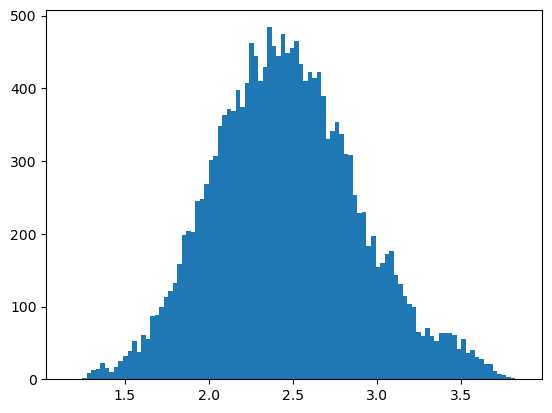

In [4]:
plt.hist(N_eff,bins=100)
plt.show()

In [5]:
""" Add functions needed for plots """

plt.rcParams.update({
    "mathtext.fontset": "cm",
    "text.usetex": True
})

col = sns.color_palette("colorblind") 

# Function to scale -ve and positive axis differently
def get_scale(a=1):  # a is the scale of your negative axis
    def forward(x):
        x = (x >= 0) * x + (x < 0) * x * a
        return x

    def inverse(x):
        x = (x >= 0) * x + (x < 0) * x / a
        return x

    return forward, inverse

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

/tmp/ipykernel_463619/62377023.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Omg_r-Omg_r_LCDM, hist=True,color='#388E3C')


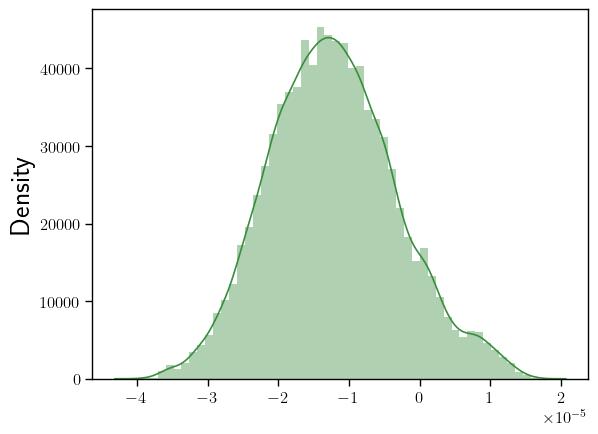

In [32]:
Omg_r = (1 + (7/8) * (4/11)**(4/3)*N_eff)*9.227e-5
Omg_r_LCDM = (1 + (7/8) * (4/11)**(4/3)*3.044)*9.227e-5


alpha_C_min = -4.5e-5
alpha_C_max = 2.3e-5
N_eff_min = (alpha_C_min/9.227e-5)/((7/8) * (4/11)**(4/3)) + 3.044
N_eff_max = (alpha_C_max/9.227e-5)/((7/8) * (4/11)**(4/3)) + 3.044


flat_samples = pd.DataFrame(data={"4DEGB":["yes"]*len(H0),r"$H_0$":H0,r"$\tilde{\alpha}_C$":Omg_r-Omg_r_LCDM})

ax1 = sns.distplot(Omg_r-Omg_r_LCDM, hist=True,color='#388E3C')

/home/c2042999/anaconda3/envs/4DEGB_venv2/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


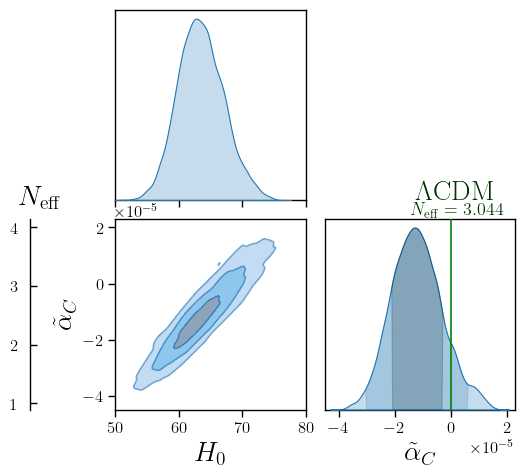

In [39]:
sns.set_context("paper", rc={"axes.labelsize":20,'xtick.labelsize': 12,'ytick.labelsize': 12})

g = sns.pairplot(flat_samples,
                 corner=True,
                 kind = 'kde',
                 #hue="4DEGB",
                 #palette = [lighten_color(col.as_hex()[0], amount=1.2)],
                 grid_kws={"despine": False},
                 plot_kws={"levels": np.array([np.exp(-9/2),np.exp(-2.0),np.exp(-0.5)]),
                          "fill": False,
                          #"thresh": np.exp(-9/2),
                          #"multiple" : "layer",
                          'alpha': 0.5})

g.map_lower(sns.kdeplot, levels=np.array([np.exp(-9/2),np.exp(-2.0),np.exp(-0.5),1]),
            fill= True, color=lighten_color(sns.color_palette()[0], amount=1.5),alpha = 0.6)

g.axes[1,0].set_ylim((alpha_C_min,alpha_C_max))
g.axes[0,0].set_xlim((50,80))

#### 1D histograms #####
#plotting the two lines
#p1 = plt.axvline(x=np.average(Omg_r-Omg_r_LCDM)+np.std(Omg_r-Omg_r_LCDM)/2,color='#EF9A9A')
#p2 = plt.axvline(x=np.average(Omg_r-Omg_r_LCDM)-np.std(Omg_r-Omg_r_LCDM)/2,color='#EF9A9A')

kde_x, kde_y = ax1.lines[0].get_data()

plt.fill_between(x=kde_x,y1 = kde_y,
                where=(kde_x<np.average(Omg_r-Omg_r_LCDM)+np.std(Omg_r-Omg_r_LCDM)) & (kde_x>np.average(Omg_r-Omg_r_LCDM)-np.std(Omg_r-Omg_r_LCDM)),
                interpolate=True,alpha=0.2,color="k")
plt.fill_between(x=kde_x,y1 = kde_y,
                where=(kde_x<np.average(Omg_r-Omg_r_LCDM)+2*np.std(Omg_r-Omg_r_LCDM)) & (kde_x>np.average(Omg_r-Omg_r_LCDM)-2*np.std(Omg_r-Omg_r_LCDM)),
                interpolate=True,alpha=0.2,color=lighten_color(sns.color_palette()[0], amount=1.0))

#### TO ADD TEXT ####
plt.plot(np.zeros(3),np.linspace(0,1e5,3),color="g")
plt.ylim(0,4.6e4)
plt.xlim(alpha_C_min,alpha_C_max)
plt.xticks(ticks=[-4e-5,-2e-5,0,2e-5])

g.fig.text(0.7,0.52, r"$\Lambda\mathrm{CDM}$", size = 20,color=lighten_color("g", amount=1.2))
g.fig.text(0.69,0.49, r"$N_{\mathrm{eff}} = 3.044$", size = 13,color=lighten_color("g", amount=1.2))

#### Add extra axes for Neff ####
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
par2 = plt.gca().twinx() 
par2.spines[["left","right"]].set_position(("axes", -1.55))
make_patch_spines_invisible(par2)

par2.spines["left"].set_visible(True)
par2.tick_params(axis='y',direction="out", labelleft = True, labelright = False, grid_linewidth=2)
par2.set_ylim(N_eff_min, N_eff_max)


g.fig.text(-0.092,0.51, r"$N_{\mathrm{eff}}$", size = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.1)

plt.savefig("ACT_cornerplot.pdf",dpi=300, format='pdf', bbox_inches='tight')


maximum likelihood H0 =  62.664901662641554


/tmp/ipykernel_463619/2040724190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(H0, hist=True)


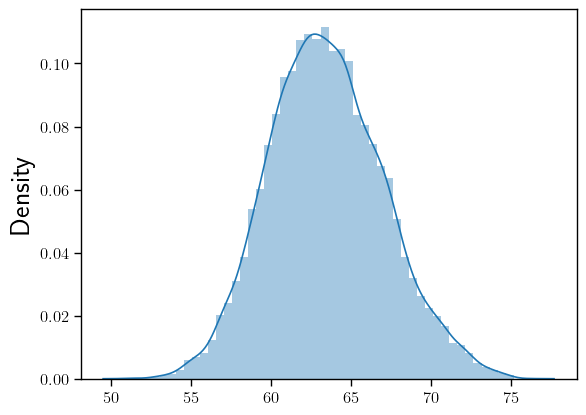

In [48]:
ax2 = sns.distplot(H0, hist=True)
H0_x, H0_y = ax2.lines[0].get_data()
max_H0 = (H0_x[np.argmax(H0_y)])
print("maximum likelihood H0 = ", max_H0)

In [49]:
max_aC = (kde_x[np.argmax(kde_y)])
max_Neff = (max_aC/9.227e-5)/((7/8) * (4/11)**(4/3)) + 3.044
print("maximum likelihood of smoothed dist = ", max_Neff)
print("standard deviation = ", np.std(N_eff))

maximum likelihood of smoothed dist =  2.424880251351833
standard deviation =  0.4323394697256479


In [45]:
print(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9/2), 1 - np.exp(-8))

0.3934693402873666 0.8646647167633873 0.9888910034617577 0.9996645373720975


In [46]:
print(np.average(N_eff))
print(np.median(N_eff))
print(np.median(H0))
print(N_eff[np.argmin(chi_squared)])
print(st.mode(N_eff)[0])
print(np.std(N_eff))

2.4628116536379383
2.4450195
63.30811
2.081079
2.344508
0.4323394697256479


In [10]:
Omg_r = (1 + (7/8) * (4/11)**(4/3)*np.average(N_eff))*9.227e-5
Omg_r_LCDM = (1 + (7/8) * (4/11)**(4/3)*3.044)*9.227e-5

print(Omg_r - Omg_r_LCDM)
print(np.std(N_eff)*(Omg_r - Omg_r_LCDM)/np.average(N_eff))

-1.2178913502713717e-05
-2.1379730755374525e-06


In [50]:
h_fid = max_H0/100
Omg_g = 2.4728905782994593*10**(-5)/h_fid**2
w_g = 2.4728905782994593*10**(-5)

print("alpha_C_mean= ",((7/8) * (4/11)**(4/3)*(2.42-3.044))*Omg_g)
print("std=", (((7/8) * (4/11)**(4/3)*(max_Neff-3.044))*Omg_g)*np.std(N_eff)/(max_Neff-3.044))


print("h^2 * alpha_C_mean= ",((7/8) * (4/11)**(4/3)*(max_Neff-3.044))*w_g)
print("h^2 * std=",(((7/8) * (4/11)**(4/3)*(max_Neff-3.044))*w_g)*np.std(N_eff)/(max_Neff-3.044))

alpha_C_mean=  -8.924253382677302e-06
std= 6.183184255070552e-06
h^2 * alpha_C_mean=  -3.4770479926235403e-06
h^2 * std= 2.428068380347797e-06
